<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [7]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
from os.path import basename, splitext
import re
import math
import more_itertools as mit
from datetime import datetime, date

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = '/home/kris/Документы/user_identification'

In [13]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    
    csv_files = glob(path_to_csv_files + '/*.csv')
    csv_files.sort()
    
    all_sites = []
    timestamp = []
    #добавление сайтов и даты их посещения в списки
    for file in tqdm_notebook(csv_files):
        data = pd.read_csv(file, engine = 'python')
        all_sites.append(data['site'])
        timestamp.append(data['timestamp'])
        
    #открытие уже ранее созданного частотного словаря    
    with open(site_freq_path, 'rb') as fp:
        frequency_dict = pickle.load(fp)
        
    #создание списка с id пользователей 
    user_id = []
    for i in csv_files:
        file_name, _ = splitext(basename(i))
        file_name = re.sub('^0*', '', file_name[4:])
        user_id.append(int(file_name))   

    columns_sites = ['site' + str(i) for i in range(1, session_length + 1)]
    columns_times = ['diff_time' + str(i) for i in range(1, session_length + 1)]

    features_sites = []
    features_times = []
    
    #формирование сессий по каждому пользователю в зависимости от длины сессии(session_length) и ширины окна(window_size)
    for index, (times, sites) in enumerate(zip(timestamp, all_sites)):
        times_number = times.shape[0]
        rows = math.ceil(times_number / window_size)
        length = rows * session_length
        sessions_times = np.empty(length, dtype=object)
        sessions_sites = np.empty(length, dtype=int)
        zeros = length - times_number
        sessions_id = np.empty(length, dtype=int)

        if zeros > 0:
            sessions_times[-zeros:] = 0
            sessions_sites[-zeros:] = 0
            
        #формирование таблицы c индексами сайтов, посещенными пользователеми
        for i, site in enumerate(sites):
            sessions_sites[i] = frequency_dict[site][0]
        sessions_sites = np.reshape(sessions_sites, (rows, -1))
        sessions_sites = np.array(list(mit.windowed(sessions_sites.ravel(), n=session_length, step=window_size)))
        data_sites = pd.DataFrame(sessions_sites, columns=columns_sites)
        features_sites.append(data_sites)
        
        #формирование таблицы c продолжительностью посещения каждого сайта в секундах
        for i, time in enumerate(times):
            if i < (len(times) - 1):
                time_delta = (datetime.strptime(str(times[i+1]), '%Y-%m-%d %H:%M:%S') - 
                              datetime.strptime(str(times[i]), '%Y-%m-%d %H:%M:%S')).seconds
            sessions_times[i] = time_delta
        sessions_times = np.reshape(sessions_times, (rows, -1))
        sessions_times = np.array(list(mit.windowed(sessions_times.ravel(), n=session_length, step=window_size)))
        data_times = pd.DataFrame(sessions_times, columns=columns_times)  
        features_times.append(data_times)
        data_times['user_id'] = user_id[index]
        
    features_sites = features_sites[0].append(features_sites[1:])
    features_times = features_times[0].append(features_times[1:])

    data = pd.concat([features_sites, features_times], axis=1)
    data = data.fillna(0)
    data = data[(data.site1 > 0)]
    
    #создание разреженной матрицы
    X, y = data.iloc[:, :session_length].values, data.iloc[:, -1].values
    X_sparse = csr_matrix((np.ones(X.size, dtype=int),
                               X.reshape(-1),
                               np.arange(X.shape[0] + 1) * X.shape[1]))[:, 1:]
    return X_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [14]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'data/3users'), 
                                                       os.path.join(PATH_TO_DATA,'week1/files/site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [15]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [17]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA, 'data/%susers/') % num_users, 
                                                          os.path.join(PATH_TO_DATA,'week1/files/site_freq_%susers.pkl') % num_users,
                                                           session_length=session_length, 
                                                           window_size=window_size)
            
            data_lengths.append(X_sparse.shape[0])
            
            with open(os.path.join(PATH_TO_DATA, 'week2/files/X_sparse_%susers_s%s_w%s.pkl' % (num_users, 
                                                                                   session_length,
                                                                                   window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
    
            with open(os.path.join(PATH_TO_DATA, 'week2/files/y_%susers_s%s_w%s.pkl' % (num_users, 
                                                                            session_length, 
                                                                            window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)


CPU times: user 11min 16s, sys: 2.57 s, total: 11min 18s
Wall time: 11min 17s


**<font color='red'> Вопрос 1. </font>Каковы длины(число сессий) новых разреженных 16 матриц?**

In [18]:
with open('answers/answer2_1.txt', 'w') as f:
    ans = " ".join(map(str, data_lengths))
    f.write(ans)

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [19]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'week1/files/train_data_10users.csv'), 
                       index_col='session_id')

In [20]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,...,diff_time2,diff_time3,diff_time4,diff_time5,diff_time6,diff_time7,diff_time8,diff_time9,diff_time10,user_id
session_id,,,,,,,,,,,,,,,,,,,,,
0,193,574,133,3,133,133,3,133,203,133,...,0,0,1,20,1,0,1,0,0,31
1,422,192,681,257,133,31,398,4223,217,55,...,0,163,105,0,1,3,3,8,1,31
2,55,3,55,55,5,293,422,341,910,55,...,14,1,242,0,0,1,0,0,0,31
3,476,4196,476,55,55,55,55,958,200,124,...,1,0,1,25,1,0,0,0,0,31
4,346,55,5,4668,258,211,4422,2286,700,2286,...,0,1,1,1,0,1,1,0,1,31


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 533
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   site1        14061 non-null  int64
 1   site2        14061 non-null  int64
 2   site3        14061 non-null  int64
 3   site4        14061 non-null  int64
 4   site5        14061 non-null  int64
 5   site6        14061 non-null  int64
 6   site7        14061 non-null  int64
 7   site8        14061 non-null  int64
 8   site9        14061 non-null  int64
 9   site10       14061 non-null  int64
 10  diff_time1   14061 non-null  int64
 11  diff_time2   14061 non-null  int64
 12  diff_time3   14061 non-null  int64
 13  diff_time4   14061 non-null  int64
 14  diff_time5   14061 non-null  int64
 15  diff_time6   14061 non-null  int64
 16  diff_time7   14061 non-null  int64
 17  diff_time8   14061 non-null  int64
 18  diff_time9   14061 non-null  int64
 19  diff_time10  14061 non-null  int64
 20  user_id 

**Распределение целевого класса:**

In [22]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [23]:
num_unique_sites = [np.unique(train_df.values[i, :10]).shape[0] 
                    for i in range(train_df.shape[0])]

In [24]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

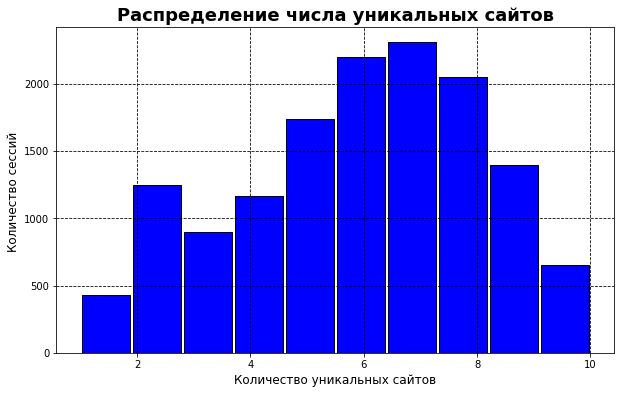

In [25]:
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.grid(color = 'black', linestyle = '--')
plt.hist(num_unique_sites, color='blue', edgecolor = 'black', rwidth = 0.95)
plt.title('Распределение числа уникальных сайтов',fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество уникальных сайтов', fontsize = 12)
plt.ylabel('Количество сессий ', fontsize = 12)
plt.show()

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

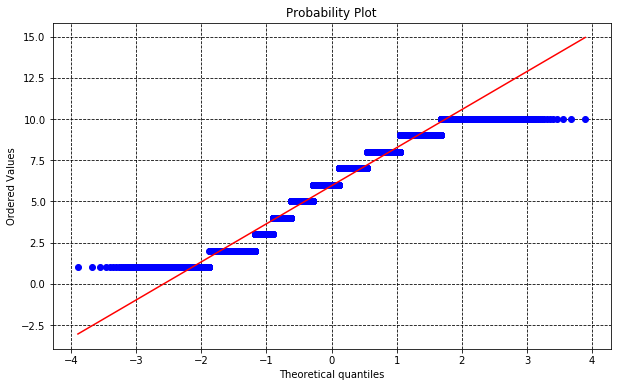

In [26]:
pylab.figure(figsize=(10,6))
pylab.grid(True)
pylab.grid(color = 'black', linestyle = '--')
stats.probplot(num_unique_sites, dist="norm", plot=pylab);

Уже по QQ-плоту видим, что число уникальных сайтов распределено не нормально. Но проверим более строго с помощью критерия Шапиро-Уилка.

Критерий Шапиро-Уилка:

𝐻0: число уникальных сайтов распределено нормально

𝐻1: не нормально.

In [27]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


P-value намного меньше 0.05, cледовательно нулевая гипотеза отвергается. Число уникальных сайтов распределено не нормально.

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [28]:
with open('answers/answer2_2.txt', 'w') as f:
    f.write('NO')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

𝐻0: доля равна 95 %

𝐻1: доля > 95%

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [29]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [31]:
pi_val = stats.binom_test(has_two_similar.sum(), len(has_two_similar), 0.95)/2
print('P-value = %f. Это меньше уровня значимости 0.05, следовательно нулевая гипотеза отвергается в пользу альтернативной.' % pi_val)

P-value = 0.022092. Это меньше уровня значимости 0.05, следовательно нулевая гипотеза отвергается в пользу альтернативной.


In [32]:
with open('answers/answer2_3.txt', 'w') as f:
    f.write(str(pi_val))

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [33]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')

In [71]:
print('Интервал Уилсона [%f, %f] с шириной %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

Интервал Уилсона [0.950103, 0.957053] с шириной 0.006950


In [34]:
with open('answers/answer2_4.txt', 'w') as f:
    ans = str(round(wilson_interval[0], 3)) + ' ' + str(round(wilson_interval[1], 3))
    f.write(ans)

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [35]:
with open(os.path.join(PATH_TO_DATA, 'week1/files/site_freq_10users.pkl'), 'rb') as fp:
    site_dict = pickle.load(fp)

In [36]:
site_freqs = [site_dict[key][1] for key in site_dict if site_dict[key][1] > 1000]

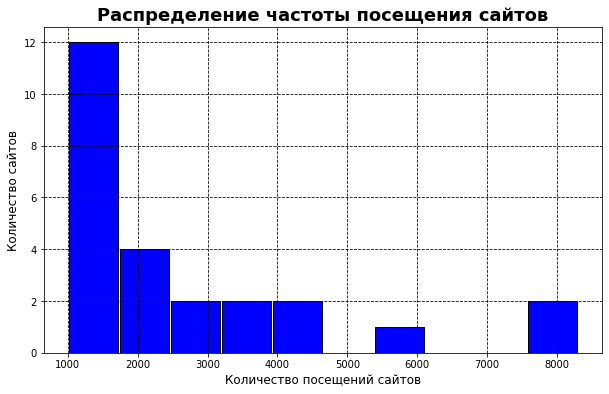

In [37]:
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.grid(color = 'black', linestyle = '--')
plt.hist(site_freqs, color='blue', edgecolor = 'black', rwidth = 0.95)
plt.title('Распределение частоты посещения сайтов',fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество посещений сайтов', fontsize = 12)
plt.ylabel('Количество сайтов', fontsize = 12)
plt.show()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [38]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [39]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [40]:
site_freqs_all = [site_dict[key][1] for key in site_dict]
site_freqs_all_mean = list(map(np.mean, get_bootstrap_samples(np.array(site_freqs_all), len(site_dict))))
print("95% доверительный интервал для средней частоты появления сайта в выборке:",  stat_intervals(site_freqs_all_mean, 0.05))

95% доверительный интервал для средней частоты появления сайта в выборке: [22.51524527 35.76303684]


In [41]:
with open('answers/answer2_5.txt', 'w') as f:
    ans = str(round(stat_intervals(site_freqs_all_mean, 0.05)[0], 3)) + ' ' + str(round(stat_intervals(site_freqs_all_mean, 0.05)[1], 3))
    f.write(ans)

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.